# Convolutions and image processing

# Facemorpher

I wanted to use this with Marilyn

[github](https://github.com/alyssaq/face_morpher)


Here is the [doc](http://alyssaq.github.io/face_morpher/).


It took me 2h to install it.
But after that it was easy to use...

----


```sudo apt-get install g++```

create a virtual environment and install into it

- ```conda create --name opencv-env python=3.6
conda activate opencv-env```
- ```pip install opencv-contrib-python```
- ```pip install facemorpher```


install the kernel in jupyter

- ```conda install -c anaconda ipykernel```
- ```python -m ipykernel install --user --name=opencv-env```

---



---

what about this ?

https://github.com/spmallick/learnopencv/blob/master/FaceMorph/faceMorph.py

or 

[this project](https://ccrma.stanford.edu/~jacobliu/368Report/index.html)




In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
import facemorpher as fm
import imageio
import cv2

ModuleNotFoundError: No module named 'imageio'

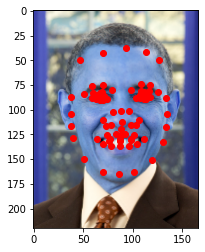

In [19]:
img = cv2.imread('./obama.png')
X,Y = fm.locator.face_points(img).T
plt.imshow(img);
plt.plot(X,Y, 'ro');

In [28]:
pp = fm.morpher(['./marilyn.png','./obama.png'],
                 num_frames= 60,
                out_video='xx.avi' )

./marilyn.png
./obama.png
xx.avi saved


In [25]:
pp

In [30]:
! ../.g


[master 9161fd1] web
 4 files changed, 5343 insertions(+), 1373 deletions(-)
 create mode 100644 PROG/.ipynb_checkpoints/face_morph-checkpoint.ipynb
 rewrite PROG/.ipynb_checkpoints/image_convol-checkpoint.ipynb (61%)
 create mode 100644 PROG/face_morph.ipynb
Counting objects: 5, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 899.44 KiB | 9.78 MiB/s, done.
Total 5 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   4e74e0f..9161fd1  master -> master


In [3]:
import cv2
import numpy as np

I got an error because cv2 is not in Anaconda so I installed it.

In Linux you can do it like this:

In [ ]:

! pip install imageio

---

## Let's improve his code 

Change some **dumb** variable names.
- you shouldn't really use [camel case](https://en.wikipedia.org/wiki/Camel_case) 
- use [snake case](https://en.wikipedia.org/wiki/Snake_case) in Python

## Removing redundant ```if```s

So this guy doesn't know that ```range``` was modified to take into account ```strides```
[OMG](https://docs.python.org/2.3/whatsnew/section-slices.html).


## More redundant ifs

I can't believe he is putting this on the web

This is probably the best way to see what is going on

In [32]:
def convolve2D(image, 
               kernel, 
               padding=0,
               strides=1):
    
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    x_ker, y_ker = kernel.shape
    x_size, y_size = image.shape[0:2]

    im_padded = np.pad(image, padding,  
                       mode='constant', 
                       constant_values=(0))
    
    # Initialize Output Convolution
    x_out = int(((x_size - x_ker + 2 * padding) / strides) + 1)
    y_out = int(((y_size - y_ker + 2 * padding) / strides) + 1)
    output = np.zeros((x_out, y_out))

    # Iterate through image
    for y in range(0, y_size - y_ker, strides):
        for x in range(0, x_size - x_ker, strides):
            # do the dot product
            output[x, y] = (kernel * im_padded[x: x + x_ker, y: y + y_ker]).sum()

    return output

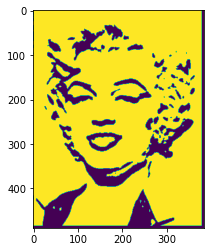

In [112]:
kernel = np.array([[-1, -1, -1], 
                   [-1,  8, -1], 
                   [-1, -1, -1]])

if False:
    kernel = 2*np.ones((20,20)) 
    kernel[:,5:10] = -20
    kernel /= kernel.sum()

dd = 5
if True:
    kernel = -20*np.ones((5*dd,1*dd)) 
    kernel[2*dd:4*dd] = 40
    kernel /= kernel.sum()

V = np.array([1,0,-1])
#kernel = np.vstack([V, -2*V, V])

image = processImage('marilyn.png')

output = convolve2D(image, kernel, padding=2)
output[ output >50 ] = 255
output[ output <50 ] = 0
cv2.imwrite('2DConvolved.png', output);
im = imageio.imread('./2DConvolved.png')
plt.imshow(im);

In [183]:
! ../.g


[master 5af174d] web
 1 file changed, 29 insertions(+), 14 deletions(-)
Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 817 bytes | 817.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   0c6c06e..5af174d  master -> master


---  

# Rewrite 

- using signal.convolve
- skimage.io

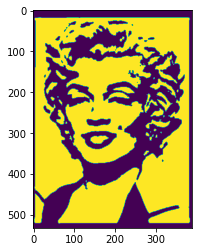

In [161]:
from skimage import io
img = io.imread( "./marilyn.png", as_gray=True)


kernel = -20*np.ones((5*dd,1*dd)) 
kernel[2*dd:4*dd] = 40
kernel /= kernel.sum()

#V = np.array([1,0,-1])
#kernel = np.vstack([V, -2*V, V])


img_conv = scipy.signal.convolve2d( img, 
                                 kernel, 
                                 boundary='fill')

output = np.copy(img_conv)
#the values are float
mask = output > .7
output[ mask] = 1.
output[~mask] = 0

plt.imshow(output);

---

## Varying the parameter in mask

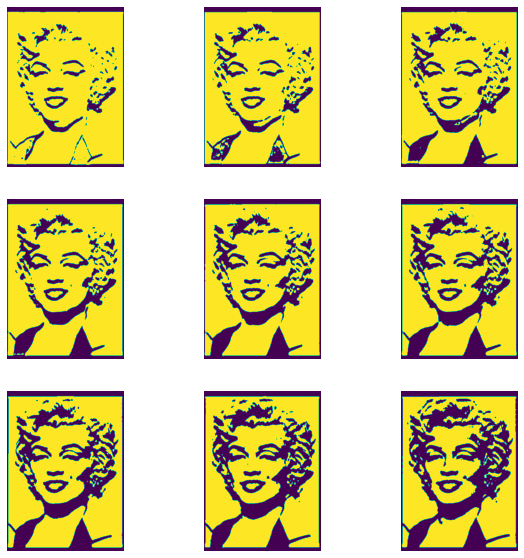

In [177]:
imgs = []
for k in np.linspace(.05,.75, 9):
    output = np.copy(img_conv)
    #the values are float
    mask = output > k
    output[ mask] = 1.
    output[~mask] = 0
    imgs.append(output)
    
num_rows, num_cols = 3,3
fig, axs = plt.subplots(num_rows, num_cols)
fig.set_size_inches(10,10)

axs = axs.ravel()
for ax,pic in zip(axs, imgs):
    ax.set_axis_off() 
    ax.imshow(pic)
    
    


---

##  Interpolating between endpoints

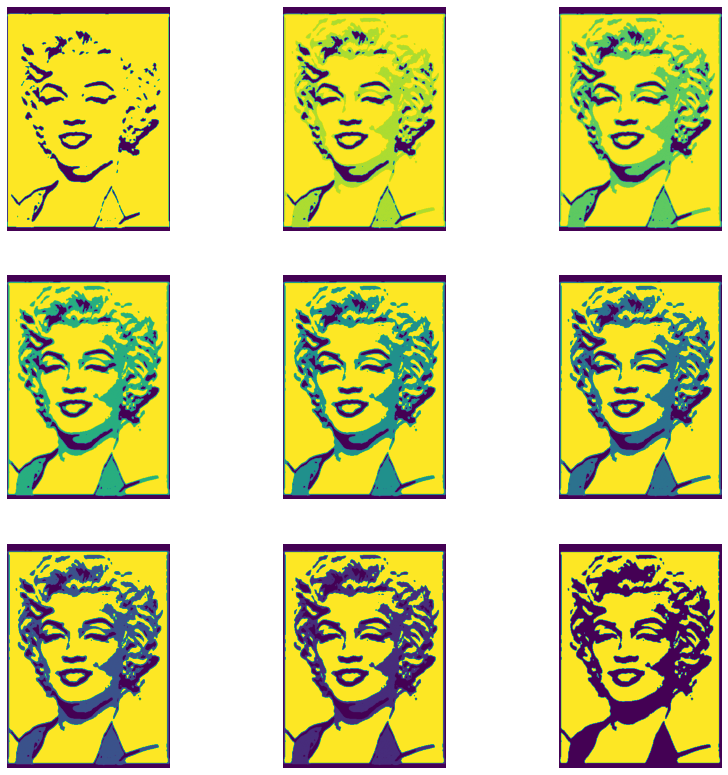

In [178]:
num_rows, num_cols = 3,3
fig, axs = plt.subplots(num_rows, num_cols)
fig.set_size_inches(14,14)

axs = axs.ravel()
    
for ax in axs:
    ax.set_axis_off() 
 
for t, ax in zip(np.linspace(0,1,9), axs):
    ax.imshow(t*imgs[-1] + (1-t)*imgs[0]);

---

## But of course

You would never, ever write a function like this as  ``` cv2```
has functions for
[edge detection](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html)

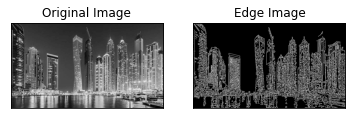

In [250]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./test_image.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Exo 

1.Try and compare the difference between the images

- subtract the arrays remember they are vectors
- calculate the $\|.\|_1$ distance
- calculate the $\|.\|_2$ distance
    
2. Change the kernel
  - so that it smooths/blurs the image.
  - use the Sobel kernel $\begin{pmatrix}
1 & 0 & −1 \\
2 & 0 & −2 \\
1 & 0 & −1
\end{pmatrix}$


3. Change the value of ```size``` below what happens ?
Fix it so it works.

4. What happens if we smooth a fractal like the Koch curve ?

---


5. Can you find a way of getting the original image back from the convolution ? 


Think about this then look at [this notebook](./conv_kernels.ipynb)



---


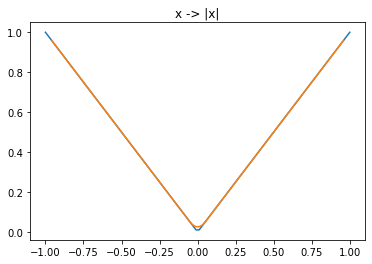

In [336]:
X = np.linspace(-1,1,100)
Y = np.abs(X)

size = 5

plt.plot(X,Y);
plt.plot(X[2:-2], 1/size * np.convolve(Y, np.ones(size))[4:-4])
plt.title('x -> |x|');

# Convolution applied to a curve

There is a problem. Can u see why this doesn't work ?

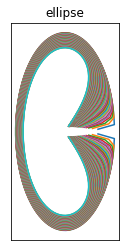

In [361]:
fig, ax = plt.subplots()

#fig.set_size_inches(8,8)
ax.set_aspect('equal')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

K = np.ones(3)/3

T = np.linspace(0, 2*np.pi, 90)
Z = np.exp(1J*T)
X, Y = Z.real, 2*Z.imag
for k in range(100):
    X =  np.convolve(X, K, mode='same')
    Y =  np.convolve(Y, K, mode='same')
    ax.plot(X,Y)
plt.title('ellipse');

# this works

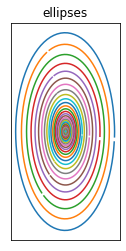

In [371]:
def circular_convolve(X, window=4):
    return sum([np.roll(X,k) for k in range(window)])/window
    

fig, ax = plt.subplots()

#fig.set_size_inches(8,8)
ax.set_aspect('equal')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


T = np.linspace(0, 2*np.pi, 90)
Z = np.exp(1J*T)
X, Y = Z.real, 2*Z.imag
for k in range(2000):
    X = circular_convolve(X)
    Y = circular_convolve(Y)
    if k % 40 == 0:
        ax.plot(X,Y)
plt.title('ellipses');

what is happening ?

In [373]:
(max(Y) - min(Y))/(max(X) - min(X))


1.978965146699576

---

# Game of life

I am going to program this using a convolution and boolean masks.

### References

[a blog](https://nicholasrui.com/2017/12/18/convolutions-and-the-game-of-life/#:~:text=The%20Game%20of%20Life%20is,its%20neighbors%20must%20be%20alive.)

---

The state of the game is represented by a 2D array ```G``` of integers 
$\in \{ 1,0 \}$.
- 0 is dead.
- 1 is alive.

There are four rules in the [game of life](https://fr.wikipedia.org/wiki/Jeu_de_la_vie#R%C3%A8gles).
We apply a convolution to G to obtain H 
which calculates the number of neighbors.


Now we modify the values in H so that they are either 0 or 1 :

- H[H<=2] = 0
- H[(H==4)&(G==0) ] = 0
- H[H>4] = 0
- H[H>0] = 1

---

### Test Code

I have coded a [planeur](https://fr.wikipedia.org/wiki/Planeur_(jeu_de_la_vie))
to test the code.

---

## Animation

I'm going to make an animation. 

- The helper functions  to do this  are in the next cell. 
- You should install [ffmpeg](https://ffmpeg.org/download.html).


In [69]:
import  matplotlib.animation
from matplotlib import animation

from IPython.display import HTML

##Animation code

def plot_images(img_list):
  def init():
    img.set_data(img_list[0])
    return (img,)

  def animate(i):
    img.set_data(img_list[i])
    return (img,)

  fig = plt.figure()
  ax = fig.gca()
  plt.axis('off')
  img = ax.imshow(img_list[0])

  anim = animation.FuncAnimation(fig, animate, 
                                 init_func=init,
                                 frames=len(img_list), 
                                 interval=200, 
                                 blit=True)
  return anim

## Set up 

- random starting configuration G
- the kernel K

In [87]:
K = np.ones((3,3))
K[1,1] = 0
K

array([[1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.]])

---

# Exo

My code works but my  kernel  K 

``` 
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])
```

doesn't calculate the number of neighbors.

There should be a 0 in the middle like this


``` 
array([[1., 1., 1.],
       [1., 0, 1.],
       [1., 1., 1.]])
```

---

1. Modify the code to use this kernel
1. According to the wikipedia :

L'état suivant d'une cellule est : (S = 3) OU (E = 1 ET S = 2).

Avec :

S : nombre actuel de cellules vivantes dans son voisinage (entier naturel compris entre 0 et 8 inclus) ;
E : état actuel de la cellule (entier naturel égal à 0 pour une cellule morte et égal à 1 pour une cellule vivante).

Rewrite the code to use this rule and so that there are just 3 lines in th ```for``` loop.


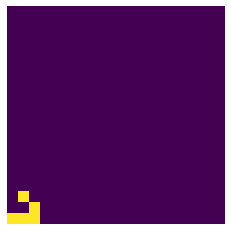

In [119]:
import  scipy 

E = np.zeros((20,20), dtype=np.int0)
#G[3,4:7] = 1
#G[3:5,3:5] = 1

#G[3,4:7] = 1
#G[4,5:8] = 1

#this is a planeur/glider to test

E[4,5:8] = 1
E[3,7] = 1
E[2,6] = 1

#E = np.random.randint(0, high=2, size=(20,20))

frames = []
for k in range(300):
    S = scipy.signal.convolve2d( E, K, boundary='wrap')[1:-1,1:-1]
    KK = np.zeros_like(S)
    KK[(S == 3) | (E == 1 ) & (S == 2)] = 1
    E = KK
    frames.append(np.copy(E))
    
HTML(plot_images(frames).to_html5_video())

In [173]:
! ../.g

[master 7641183] web
 1 file changed, 60 insertions(+), 83 deletions(-)
Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 209.26 KiB | 4.87 MiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   4facb17..7641183  master -> master
